In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt

#import data and add header row
news = pd.read_csv("NewsAggregatorDataset/newsCorpora.csv", sep="\t",
                  names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])
#lowercase text and removing punctuation in title to have smaller size of model in future
import string

def normalize(s):
    s = s.lower()
    s = s.translate(str.maketrans('','', string.punctuation))
    return s

news['TITLE'] = [normalize(s) for s in news['TITLE']]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(news['TITLE'])


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(news['CATEGORY'])


from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.4, random_state=42)




# print("Train set shape: {}, {}".format(X_train.shape, y_train.shape))
# print("Train set shape: {}, {}".format(X_test.shape, y_test.shape))



In [3]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import validation_curve


param_range = np.logspace(-5, 0, 5)
#can add parameters scoring="accuracy"
train_scores, test_scores = validation_curve(
    LinearSVC(), X, y, param_name="C", param_range=param_range,
    cv=5, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

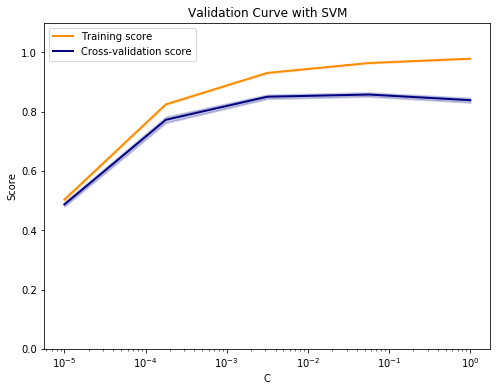

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
#save plot to the file
plt.savefig('VC-SVM.png')

In [12]:
print("training scores: {}".format(train_scores_mean))
print("cross validation scores: {}".format(test_scores_mean))

training scores: [0.50370841 0.82512209 0.93111342 0.96453817 0.9792262 ]
cross validation scores: [0.48756808 0.77292229 0.85076903 0.8581432  0.83912414]
